## STUDENTS PERFORMANCE ANALYSIS AND PREDICTION USING MACHINE LEARNING
<p align="center">
  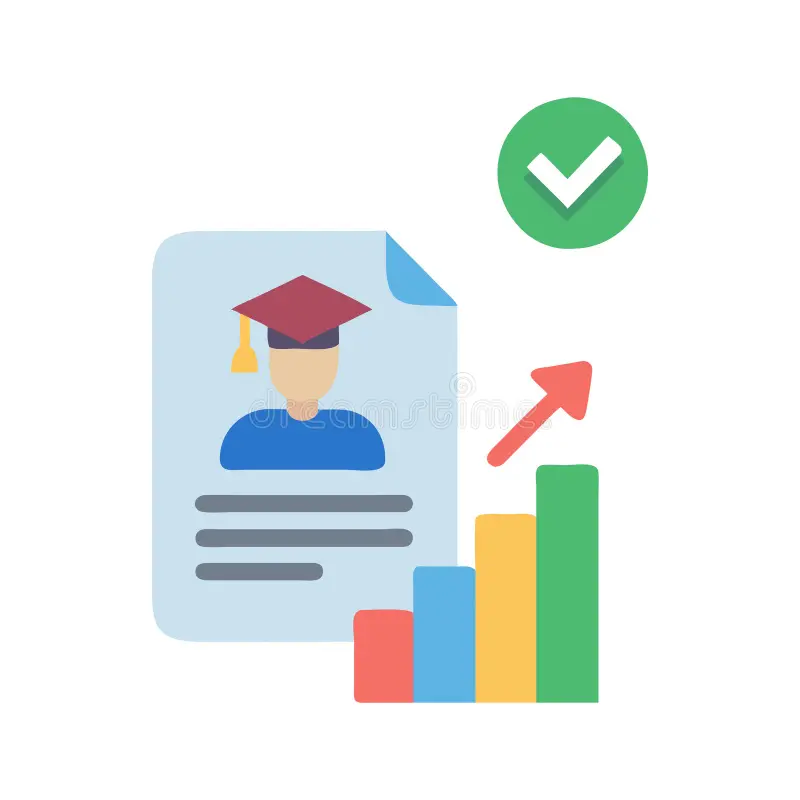
  <br>
  <em align="center">Figure: Student Performance Analysis And Performance Prediction Project</em>
</p>

#### The goal 🥅 of this project is to improve student academic performance and well-being
#### The objectives are:
1) **Descriptive Analytics**
Understand past and current student behavior and outcomes.
- Identify Key Drivers of Student Success
  
2) **Diagnostic Analytics**
Dig deeper into data to explain patterns.
- Classify Students by Performance Tier (GradeClass)

3) **Predictive Analytics**
Forecast future student risks and performance.
- Predict Academic Performance (GPA)
- Detect At-Risk Students (High Absences + Low GPA)
- Predict Dropout Risk Using Absences and Engagement

In [1]:
import pandas as pd # for data loading and cleaning
import numpy as np  #
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,  classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\chris\\OneDrive\\Documents\\Desktop\\student_performance_dataset.csv")
df = pd.DataFrame(data)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,GPA,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,ClubInvolvement,Sports,Music,Volunteering,GradeClass
0,1001,17,19.833723,7,2.929196,Female,Caucasian,Some College,Yes,Moderate,No,No,Yes,No,C
1,1002,18,15.408756,0,3.042915,Male,Caucasian,High School,No,Low,No,No,No,No,B
2,1003,15,4.210570,26,0.112602,Male,Asian,Bachelor's,No,Moderate,No,No,No,No,F
3,1004,17,10.028829,14,2.054218,Female,Caucasian,Bachelor's,No,High,Yes,No,No,No,D
4,1005,17,4.672495,17,1.288061,Female,Caucasian,Some College,Yes,High,No,No,No,No,F


### Handling Data cleaning
#### Check:
- Data Information and the Data Size
- Missing Values
- Remove Duplicate (if any duplicate)
- Filling the missing value with Simple Imputer
- Fixing Datatype (e.g., change dtype, categorical encoding)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          6055 non-null   int64  
 1   Age                6055 non-null   int64  
 2   StudyTimeWeekly    6055 non-null   float64
 3   Absences           6055 non-null   int64  
 4   GPA                6055 non-null   float64
 5   Gender             6055 non-null   object 
 6   Ethnicity          6055 non-null   object 
 7   ParentalEducation  5645 non-null   object 
 8   Tutoring           6055 non-null   object 
 9   ParentalSupport    5755 non-null   object 
 10  ClubInvolvement    6055 non-null   object 
 11  Sports             6055 non-null   object 
 12  Music              6055 non-null   object 
 13  Volunteering       6055 non-null   object 
 14  GradeClass         6055 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 709.7+ KB


In [4]:
print(f"The number of the rows is {df.shape[0]}")
print(f"The number of columns in the dataset is {df.shape[1]}")

The number of the rows is 6055
The number of columns in the dataset is 15


In [5]:
for col in df.columns:
    total_null= df[col].isna().sum()
    print(f'The total number of null values in the {col} column is {total_null}') #checking for null values in the columns

The total number of null values in the StudentID column is 0
The total number of null values in the Age column is 0
The total number of null values in the StudyTimeWeekly column is 0
The total number of null values in the Absences column is 0
The total number of null values in the GPA column is 0
The total number of null values in the Gender column is 0
The total number of null values in the Ethnicity column is 0
The total number of null values in the ParentalEducation column is 410
The total number of null values in the Tutoring column is 0
The total number of null values in the ParentalSupport column is 300
The total number of null values in the ClubInvolvement column is 0
The total number of null values in the Sports column is 0
The total number of null values in the Music column is 0
The total number of null values in the Volunteering column is 0
The total number of null values in the GradeClass column is 0


In [6]:
print(f"The number of duplicate value is {df.duplicated().sum()}") # the first check for duplicate while the later remove the column StujdentID 
df.drop("StudentID",axis=1,inplace =True, errors = "Ignore")

The number of duplicate value is 0


In [7]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer for handling missing values
def value_imputer(data): #defining function for missing value
    imp = SimpleImputer(strategy="most_frequent")  # Using the most frequent value to fill missing values
    for col in data.columns:  # Iterating through all columns
        if data[col].isna().any():  # Checking if the column contains any missing values
            data[col] = imp.fit_transform(data[[col]]).ravel() # Imputing missing values; the ravel() convert the 2D back to 1D array 
    return data.isna().sum()  # Returning the count of missing values in the dataset after imputation

value_imputer(df)


Age                  0
StudyTimeWeekly      0
Absences             0
GPA                  0
Gender               0
Ethnicity            0
ParentalEducation    0
Tutoring             0
ParentalSupport      0
ClubInvolvement      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64

### Exploratory Data Analysis
#### Check:
- Number of Unique value of each column
- Descriptive Statistics
- Distribution
- Visualization of data
    -categorical features
- Categorical encoding
- Correlations 

#### 1. Checking the unique value in each column

In [8]:
# checking for the number of unique value in each column
df.nunique()

Age                     4
StudyTimeWeekly      6055
Absences               30
GPA                  6025
Gender                  2
Ethnicity               4
ParentalEducation       4
Tutoring                2
ParentalSupport         4
ClubInvolvement         2
Sports                  2
Music                   2
Volunteering            2
GradeClass              5
dtype: int64

#### 2. Check the data summary

In [9]:
# Descriptive Statictics
df.describe().style.background_gradient(cmap='rainbow')

,Age,StudyTimeWeekly,Absences,GPA
count,6055.000000,6055.000000,6055.000000,6055.000000
mean,16.246738,10.377286,9.841949,2.436893
std,1.033417,5.651446,8.151560,0.909238
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.561924,3.000000,1.879337
50%,16.000000,10.394700,8.000000,2.561965
75%,17.000000,15.194024,15.000000,3.165419
max,18.000000,19.978094,29.000000,4.000000


#### Unique Entities in each column

In [10]:
def VC(df):
    for col in df.columns:
        if df[col].dtype == "object":
            Unique_data= df[col].value_counts()
       
            print( Unique_data,"\n*********************************************************")

VC(df)

Gender
Female    3035
Male      3020
Name: count, dtype: int64 
*********************************************************
Ethnicity
Caucasian           3576
African American    1173
Asian                955
Other                351
Name: count, dtype: int64 
*********************************************************
ParentalEducation
Some College    3262
High School     1986
Bachelor's       677
Higher           130
Name: count, dtype: int64 
*********************************************************
Tutoring
No     4076
Yes    1979
Name: count, dtype: int64 
*********************************************************
ParentalSupport
High         2594
Moderate     1749
Low          1015
Very High     697
Name: count, dtype: int64 
*********************************************************
ClubInvolvement
No     3533
Yes    2522
Name: count, dtype: int64 
*********************************************************
Sports
No     4391
Yes    1664
Name: count, dtype: int64 
**********************

## Pie Chart of the Categorical features

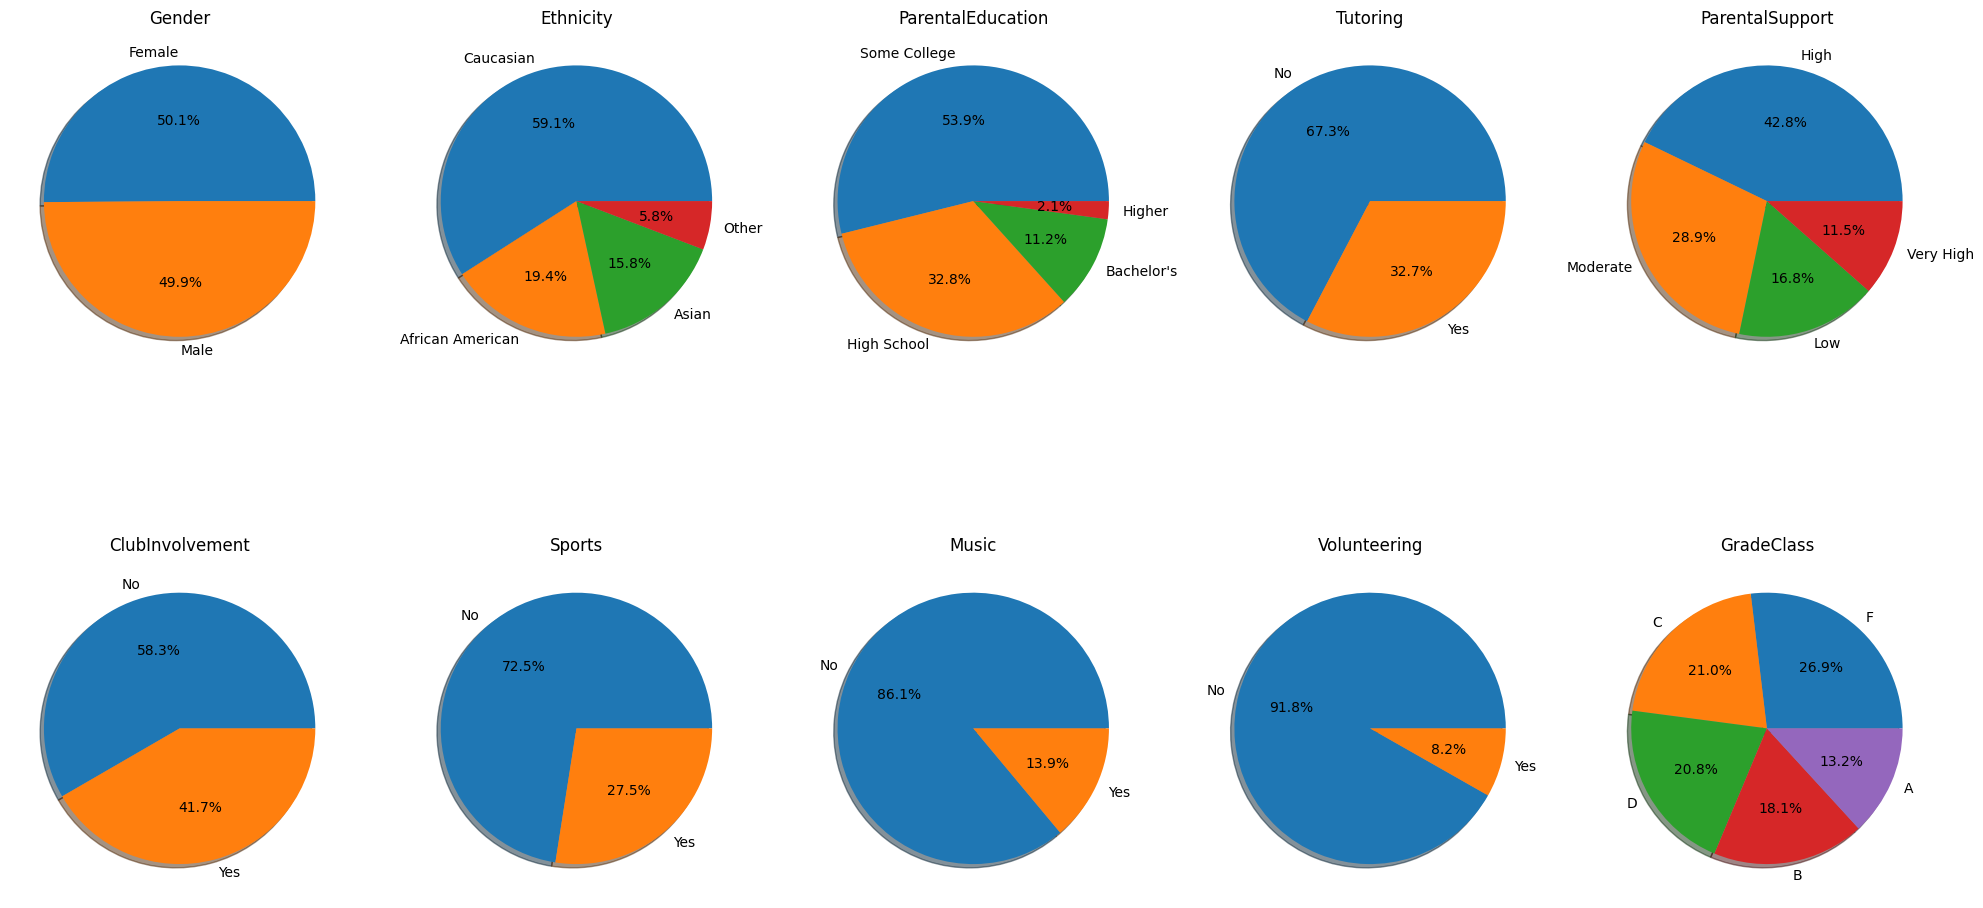

In [11]:
cat_cols = df.select_dtypes(include=['object','category']).columns #identify categorical column
import math
#  Grid formation
n = len(cat_cols)  # length of the categorical column
cols = 2
rows = max(1, math.ceil(n / cols))

# Create a figure with a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(4*rows, 6*cols))
axs = axs.flatten()  # Flatten to make it easier to index 

# loop through the categorical variables
for i, col in enumerate(cat_cols):
    axs[i].pie(df[col].value_counts(),
               autopct="%1.1f%%",
               labels=df[col].value_counts().index,
               shadow=True)
    axs[i].set_title(col)

for ax in axs[n:]:
    ax.axis('off')
# Adjust layout spacing
plt.tight_layout()
plt.show()


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
label_mappings = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Save mapping
    label_mappings[col] = dict(zip(le.transform(le.classes_), le.classes_))
print(label_mappings)

{'Gender': {np.int64(0): 'Female', np.int64(1): 'Male'}, 'Ethnicity': {np.int64(0): 'African American', np.int64(1): 'Asian', np.int64(2): 'Caucasian', np.int64(3): 'Other'}, 'ParentalEducation': {np.int64(0): "Bachelor's", np.int64(1): 'High School', np.int64(2): 'Higher', np.int64(3): 'Some College'}, 'Tutoring': {np.int64(0): 'No', np.int64(1): 'Yes'}, 'ParentalSupport': {np.int64(0): 'High', np.int64(1): 'Low', np.int64(2): 'Moderate', np.int64(3): 'Very High'}, 'ClubInvolvement': {np.int64(0): 'No', np.int64(1): 'Yes'}, 'Sports': {np.int64(0): 'No', np.int64(1): 'Yes'}, 'Music': {np.int64(0): 'No', np.int64(1): 'Yes'}, 'Volunteering': {np.int64(0): 'No', np.int64(1): 'Yes'}, 'GradeClass': {np.int64(0): 'A', np.int64(1): 'B', np.int64(2): 'C', np.int64(3): 'D', np.int64(4): 'F'}}


In [13]:
# Compute correlation matrix
corr_matrix = df.corr().round(3)
corr_matrix.style.background_gradient(cmap='rainbow')

,Age,StudyTimeWeekly,Absences,GPA,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,ClubInvolvement,Sports,Music,Volunteering,GradeClass
Age,1.000000,-0.003000,0.086000,-0.100000,-0.080000,-0.021000,0.026000,-0.039000,0.021000,-0.027000,-0.016000,0.027000,0.060000,0.092000
StudyTimeWeekly,-0.003000,1.000000,-0.032000,0.215000,-0.021000,0.038000,0.076000,0.008000,0.016000,0.020000,0.041000,-0.069000,-0.024000,-0.220000
Absences,0.086000,-0.032000,1.000000,-0.926000,0.013000,0.053000,-0.069000,-0.057000,-0.008000,-0.047000,0.012000,0.004000,0.080000,0.853000
GPA,-0.100000,0.215000,-0.926000,1.000000,-0.028000,-0.055000,0.105000,0.180000,0.023000,0.143000,0.099000,0.035000,-0.097000,-0.932000
Gender,-0.080000,-0.021000,0.013000,-0.028000,1.000000,0.037000,-0.027000,0.051000,-0.001000,-0.030000,-0.013000,-0.041000,-0.008000,0.033000
Ethnicity,-0.021000,0.038000,0.053000,-0.055000,0.037000,1.000000,0.009000,-0.011000,-0.023000,-0.067000,0.004000,-0.031000,0.000000,0.065000
ParentalEducation,0.026000,0.076000,-0.069000,0.105000,-0.027000,0.009000,1.000000,0.027000,0.038000,-0.037000,0.044000,0.036000,-0.049000,-0.110000
Tutoring,-0.039000,0.008000,-0.057000,0.180000,0.051000,-0.011000,0.027000,1.000000,0.031000,0.040000,0.061000,-0.006000,-0.071000,-0.191000
ParentalSupport,0.021000,0.016000,-0.008000,0.023000,-0.001000,-0.023000,0.038000,0.031000,1.000000,-0.078000,-0.011000,0.062000,0.020000,-0.012000
ClubInvolvement,-0.027000,0.020000,-0.047000,0.143000,-0.030000,-0.067000,-0.037000,0.040000,-0.078000,1.000000,0.039000,-0.081000,-0.048000,-0.151000


#### 📌Objective 1: Identify Key Drivers of Student Success

In [14]:
# Compute correlations (only numeric columns enter df.corr())
corr_with_gpa = corr_matrix['GPA'].drop(['GPA','GradeClass'])
# Pick the top four by absolute correlation
top5 = corr_with_gpa.abs() \
       .sort_values(ascending=False) \
       .iloc[:5] \
       .index.tolist()
print("The top four predictors of GPA:", top5)

The top four predictors of GPA: ['Absences', 'StudyTimeWeekly', 'Tutoring', 'ClubInvolvement', 'ParentalEducation']


Let's visualize the key drivers of student's  success 

In [15]:
def set_custom_axis_ticks(ax, df, x_col, y_col='GPA', num_ticks_x=6, num_ticks_y=6, label_mappings=None):
    """
    Set custom axis ticks based on actual data values instead of default intervals.
    Parameters:
    ax: matplotlib axis object
    df: pandas DataFrame
    x_col: column name for x-axis
    y_col: column name for y-axis (default: 'GPA')
    num_ticks_x: number of ticks for x-axis
    num_ticks_y: number of ticks for y-axis
    label_map: optional dict mapping encoded values to original labels
    """
    # X-axis ticks
    if df[x_col].dtype in ['object', 'category'] or df[x_col].nunique() <= 10:
        # Categorical or few unique values - show all unique values
        x_values = sorted(df[x_col].unique())
        ax.set_xticks(x_values)
        
        if label_mappings and x_col in label_mappings:
            ax.set_xticklabels([label_mappings[x_col].get(val, val) for val in x_values])
        elif df[x_col].dtype in ['int64', 'float64']:
            ax.set_xticklabels([str(int(val)) if val == int(val) else f'{val:.1f}' for val in x_values])
        else:
            ax.set_xticklabels([str(val) for val in x_values])
    
    else:
        # Continuous variable - evenly spaced ticks
        x_min, x_max = df[x_col].min(), df[x_col].max()
        x_values = np.linspace(x_min, x_max, num_ticks_x)
        ax.set_xticks(x_values)
        ax.set_xticklabels([f'{val:.1f}' for val in x_values])

    # Y-axis ticks (GPA)
    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_values = np.linspace(y_min, y_max, num_ticks_y)
    ax.set_yticks(y_values)
    ax.set_yticklabels([f'{val:.1f}' for val in y_values])

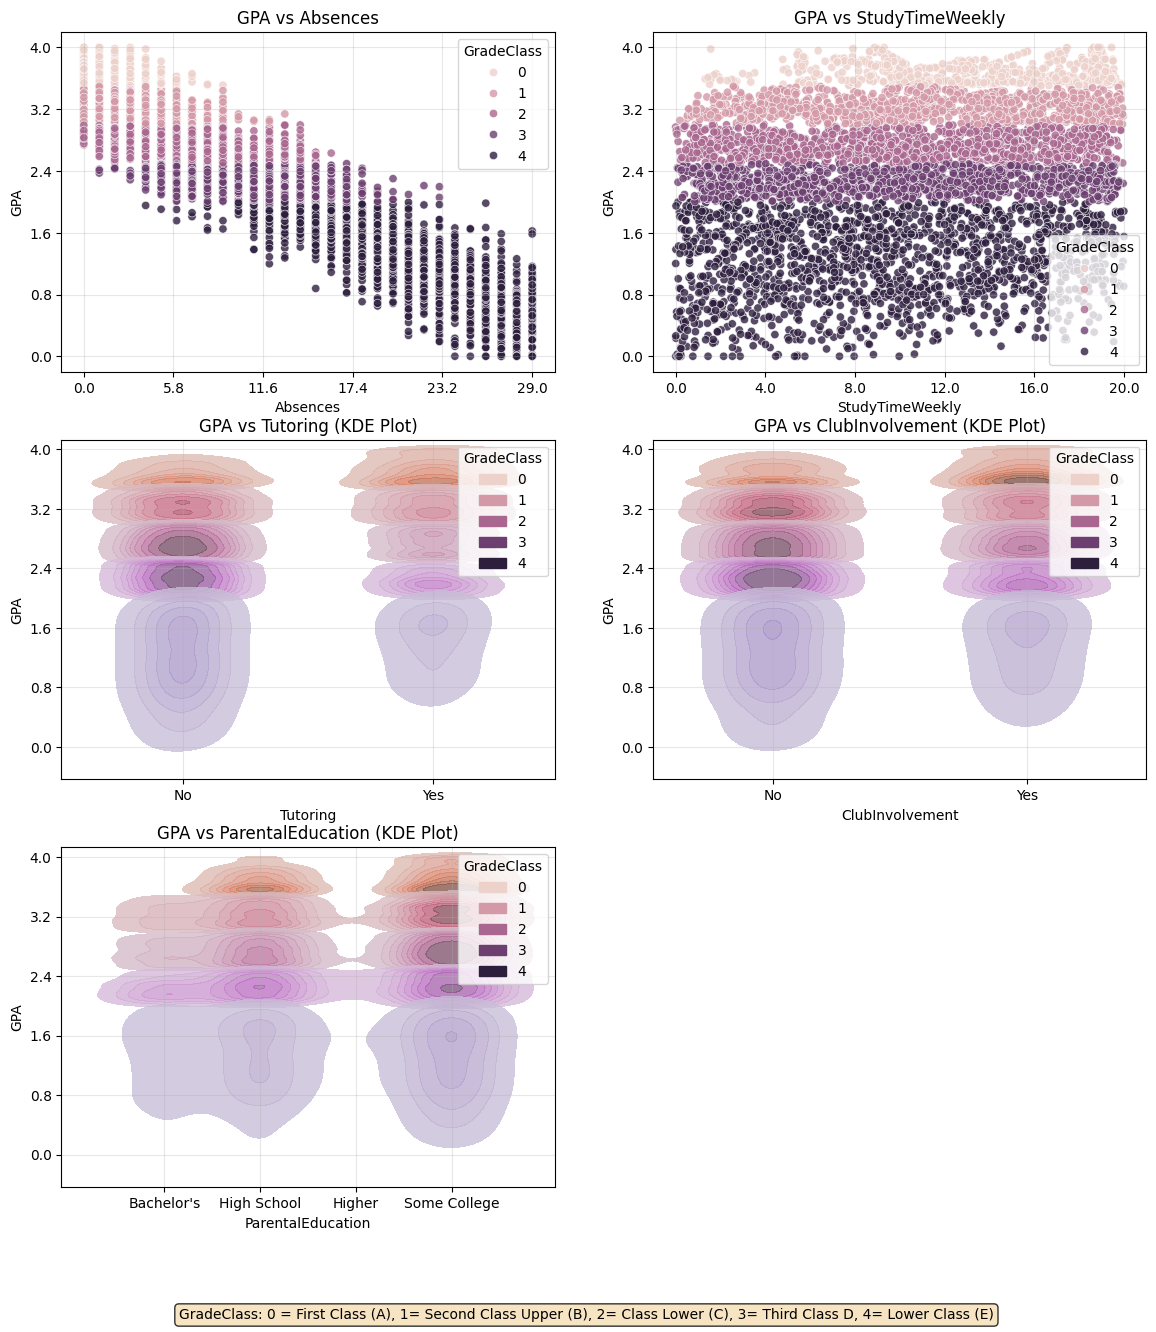

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(14,15))
axes = axes.flatten()
special_cols = ['Tutoring', 'ClubInvolvement', 'ParentalEducation']
for ax, var in zip(axes, top5):
    if var in special_cols:
        sns.kdeplot(
            x=var,
            y='GPA',
            data=df,
            ax=ax,
            fill=True,
            hue='GradeClass',
            cmap='mako',
            alpha=0.8)
        ax.set_title(f'GPA vs {var} (KDE Plot)')
    else:
        sns.scatterplot(
            x=var,
            y='GPA',
           hue='GradeClass',
            data=df,
            ax=ax,
            alpha=0.8)
        ax.set_title(f'GPA vs {var}')
    # Common labels and formatting
    ax.set_xlabel(var)
    ax.set_ylabel('GPA')
    set_custom_axis_ticks(ax, df, var, 'GPA',label_mappings=label_mappings)
    ax.grid(True, alpha=0.3)
plt.figtext(0.5, 0.02, 
                'GradeClass: 0 = First Class (A), 1= Second Class Upper (B), 2= Class Lower (C), 3= Third Class D, 4= Lower Class (E)',
                ha='center', va='bottom', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8))
axes[-1].axis('off') # Turn off the unuse subplots (the 6th one)
plt.tight_layout=()
plt.show()

### Interpretation of the above representations


**♦️GPA vs Absences**
    The scatter shows a strong, nearly monotonic negative relationship — high-density points cluster at low absence counts with GPAs ≈3.0–4.0, and as absences increase the cloud shifts down into mid/low GPAs (≈1.6–2.4) with the poorest grade-classes concentrated among the most absent students; __this demonstrates absenteeism is a clear, actionable predictor of poor academic outcomes.__

    📌Implement automated early-warning attendance triggers that assign flagged students to a short community initiative workflow (academic counsellor + needs assessment)
    📌Provide wraparound supports (transport aid, mental-health triage, flexible make-up options)
   
**♦️GPA vs StudyTimeWeekly**
The plot shows a weak-to-moderate positive trend with high dispersion — greater weekly study time nudges density upward toward higher GPAs but many low-GPA students still log substantial hours and many high performers study only moderately, __indicating study hours alone is imperfect predictor and study quality/strategy or selection effects matter__. 

     📌Prioritize teaching study effectiveness (required evidence-based workshops, faculty-led review labs, guided peer-study groups),
     📌Use LMS analytics to flag “high-hours/low-gain” students for targeted coaching.


**♦️GPA vs Tutoring**
The KDE contours make the story obvious — students who received tutoring form a tight, high-density peak clustered in the upper GPA band (≈3.2–4.0), while non-tutored students show a much broader, heavier mass at lower GPAs (≈0.8–2.4), __meaning fewer low performers and more high performers are among the tutored group;__ this pattern points to a strong positive association between tutoring and academic success (though selection effects could play a role). To act on this, schools should rapidly roll out targeted;

    📌Early-term tutoring for students flagged by first-week quizzes/attendance, 
    📌Combine structured peer and professional tutoring with weekly progress check-ins and LMS-integrated assignments,
    📌Offer small incentives or credit to boost uptake.
    📌Measure impact with a pilot (randomised or matched-control) tracking KPIs like mean GPA change, pass rates, and retention so the program can be validated and scaled if effective.


**♦️GPA vs ClubInvolvement**
The contours show a similar, human-friendly signal — students involved in clubs concentrate in a narrow, higher-GPA peak (≈3.2–4.0) while non-participants have wider, more dispersed density down in the mid–low GPA range (≈1.6–2.8), __suggesting club participation correlates with better academic outcomes (likely through engagement, mentoring, or time-management gains).__ Practically;

    📌Institutions should lower barriers to participation (funding, scheduling)
    📌Create academically-linked club activities and faculty-mentored chapters. 
    📌Proactively invite and support low-GPA students into clubs, and track participation against academic KPIs; run pilots or use propensity-score matching to distinguish selection from true effect, then scale the most effective club-academic integrations.


**GPA vs ParentalEducation** reveals a concerning educational stratification pattern where students from families with higher parental education (Bachelor's/Higher degrees) consistently cluster in superior grade classes (0-1, GPA 3.2-4.0), while those from lower educational backgrounds (High School/Some College) concentrate in lower performance tiers (grade classes 2-4, GPA 2.4-2.8). __This density separation indicates that parental educational attainment creates measurable academic advantages that perpetuate across generations__. To address this inequality;
    
    📌Educational institutions should implement targeted intervention programs such as enhanced academic support services mentorship programs
    📌College preparation resources specifically designed for first-generation college students and those from families with limited higher education experience.
    📌Thereby breaking the cycle of educational disadvantage and creating more equitable pathways to academic success.

### Diagnostic Analytics: Classify Students by Performance Tier (GradeClass)

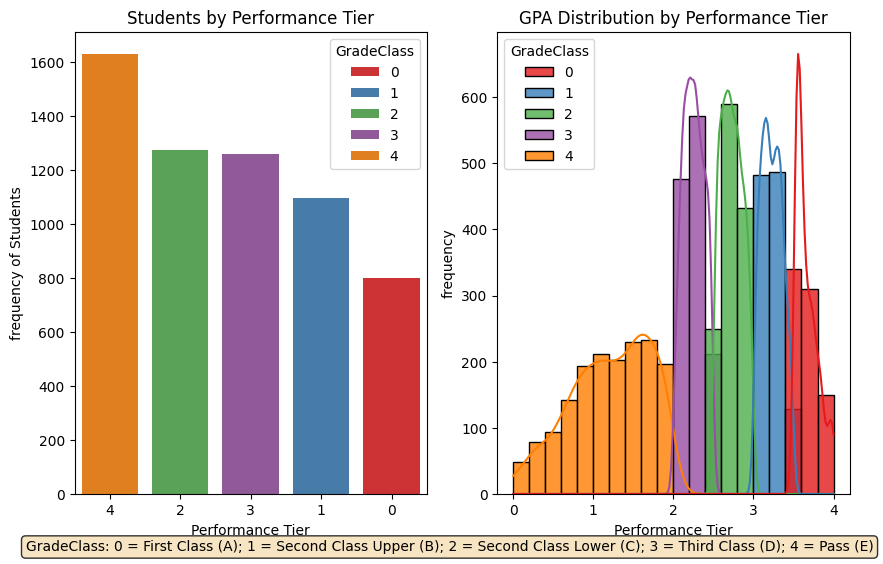

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()

# 1) Countplot of Performance Tier
sns.countplot(
    x='GradeClass',
    data=df,hue =df['GradeClass'],
    order=df['GradeClass'].value_counts().index,
    palette='Set1',
    ax=axes[0]
)
axes[0].set_xlabel('Performance Tier')
axes[0].set_ylabel('frequency of Students')
axes[0].set_title('Students by Performance Tier')

# 2) Histogram of GPA colored by GradeClass
sns.histplot(
    data=df,
    x='GPA',
    hue='GradeClass',
    multiple='layer',   # or 'dodge'
    bins=20,
    palette='Set1',
    alpha=0.8,
    kde=True,
    ax=axes[1]
)
axes[1].set_xlabel('Performance Tier')
axes[1].set_ylabel('frequency')
axes[1].set_title('GPA Distribution by Performance Tier')

# Footnote explaining GradeClass codes
plt.figtext(
    0.5, 0.01,
    'GradeClass: 0 = First Class (A); 1 = Second Class Upper (B); 2 = Second Class Lower (C); '
    '3 = Third Class (D); 4 = Pass (E)',
    ha='center', va='bottom',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8)
)
plt.show()

**♦️Students by Performance Tier:**
This chart shows a concerning reality - most students (over 1,650) are stuck in the lowest grade tier (GradeClass 4), while only 800 achieve top performance (GradeClass 0). 
This upside-down pattern suggests the institution is failing too many students. 

    📌Schools need to act fast by creating better support systems, identifying struggling students early, 
    📌Improving teaching methods to help more students succeed rather than accepting poor performance as normal.

**♦️GPA Distribution by Performance Tier:**
The histogram reveals how students cluster into distinct GPA ranges - low performers sit between 0.5-2.0, middle students around 2.5-3.0, and top achievers at 3.5-4.0. These rigid boundaries show students get trapped in their performance levels. 

    📌 Institutions should create pathways for students to move up through personalized learning plans, and mentoring programs

### ♦️Objective 3: Predictive Analytics Forecast future student risks and performance
    - Predict Academic Performance (GPA)
    - Detect At-Risk Students (High Absences + Low GPA)
    - Predict Dropout Risk Using Absences and Engagement

### ⚙️Feature Engineering  
- Data Encoding with OneHot Emncoder
- data splitting

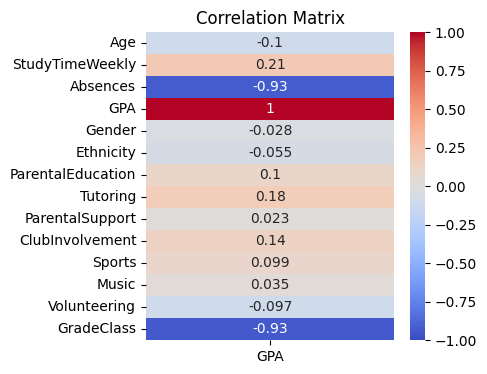

In [18]:
plt.figure(figsize=(4,4))
gpa_correlation = corr_matrix['GPA']
sns.heatmap(gpa_correlation.to_frame(), annot=True,vmin =-1,vmax =1, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [19]:
df.head()

,Age,StudyTimeWeekly,Absences,GPA,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,ClubInvolvement,Sports,Music,Volunteering,GradeClass
0,17,19.833723,7,2.929196,0,2,3,1,2,0,0,1,0,2
1,18,15.408756,0,3.042915,1,2,1,0,1,0,0,0,0,1
2,15,4.210570,26,0.112602,1,1,0,0,2,0,0,0,0,4
3,17,10.028829,14,2.054218,0,2,0,0,0,1,0,0,0,3
4,17,4.672495,17,1.288061,0,2,3,1,0,0,0,0,0,4


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
# define X and y using top5 numeric features
X = df[top5]
y = df['GPA']

# split the features to 70:30 ratio for training to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

### Hyperparameter Tuning On  RFM

In [21]:
# Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, None],  # None means unconstrained
    'regressor__min_samples_split': [5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Print best results
print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation MSE: {-grid_search.best_score_:.4f}") 

Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Hyperparameter Tuning Results ---
Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best Cross-Validation MSE: 0.0627


In [22]:
y_pred = best_model.predict(X_test)

# Evaluate the final model
mse_tuned = mean_squared_error(y_test, y_pred)
r2_tuned = r2_score(y_test, y_pred)

print("\n--- Final Model Evaluation ---")
print(f"Tuned Model Test MSE: {mse_tuned:.4f}")
print(f"Tuned Model Test R-squared: {r2_tuned:.4f}")


--- Final Model Evaluation ---
Tuned Model Test MSE: 0.0579
Tuned Model Test R-squared: 0.9288


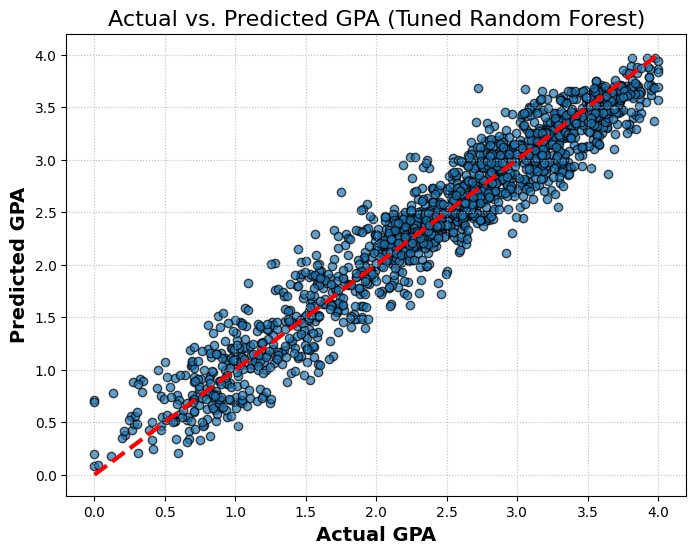


Scatter plot visualization generated successfully!


In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k') # Dark Purple

# Plot the ideal prediction line (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Ideal Prediction (y=x)')

# Set labels and title
plt.xlabel("Actual GPA", fontsize=14, fontweight='bold')
plt.ylabel("Predicted GPA", fontsize=14, fontweight='bold')
plt.title("Actual vs. Predicted GPA (Tuned Random Forest)", fontsize=16)
plt.grid(True, linestyle=':', alpha=0.8)
plt.show()

print("\nScatter plot visualization generated successfully!")


In [24]:
print("\n--- Prediction on New, Unseen Data ---")
# Create a small DataFrame of new student profiles
# Note: The column names MUST match the 'top5' features used for training!
new_data = pd.DataFrame({
    'Absences': [1, 25, 10],            # Low, High, Medium absences
    'StudyTimeWeekly': [25.0,5.5,15.0],  # High, Low, Medium study time
    'Tutoring': [1, 0, 1],              # Has, Doesn't have, Has tutoring
    'ClubInvolvement': [0,1,1],
    'ParentalEducation': [4, 0, 2],     # High, Low, Medium parental education
})

# Make predictions using the best_model pipeline
# The pipeline automatically scales the new data before prediction
new_predictions = best_model.predict(new_data)

# Combine the inputs and predictions for display
results_df = new_data.copy()
results_df['Predicted GPA'] = [f"{gpa:.4f}" for gpa in new_predictions]

print("\nNew Student GPA Predictions:")
print(results_df)


--- Prediction on New, Unseen Data ---

New Student GPA Predictions:
   Absences  StudyTimeWeekly  Tutoring  ClubInvolvement  ParentalEducation  \
0         1             25.0         1                0                  4   
1        25              5.5         0                1                  0   
2        10             15.0         1                1                  2   

  Predicted GPA  
0        3.5868  
1        0.7513  
2        2.8755  


In [25]:
import joblib
model_filename = 'gpa_prediction_pipeline.joblib'
joblib.dump(best_model, model_filename)

print(f"\nModel deployment ready! The final, tuned pipeline has been saved as '{model_filename}'")



Model deployment ready! The final, tuned pipeline has been saved as 'gpa_prediction_pipeline.joblib'


In [26]:
prediction = best_model.predict([[6,83,1,0,2]])
print(f'Your GPA for the semester will be: {prediction}')

Your GPA for the semester will be: [3.18993583]


### Detect At-Risk Students (High Absences + Low GPA)

In [27]:
# detection of students at risk based on high absences and low GPA
df[['Absences','StudyTimeWeekly','GPA']].describe()

,Absences,StudyTimeWeekly,GPA
count,6055.000000,6055.000000,6055.000000
mean,9.841949,10.377286,2.436893
std,8.151560,5.651446,0.909238
min,0.000000,0.001057,0.000000
25%,3.000000,5.561924,1.879337
50%,8.000000,10.394700,2.561965
75%,15.000000,15.194024,3.165419
max,29.000000,19.978094,4.000000


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = df[['Absences', 'StudyTimeWeekly', 'GPA']].copy()
# We want higher score = worse: Absences up, StudyTime down, GPA down
X_scaled = scaler.fit_transform(X)
# X_scaled columns order: Absences, StudyTimeWeekly, GPA
abs_scaled = X_scaled[:,0]
study_scaled = 1 - X_scaled[:,1]   # invert study time
gpa_scaled = 1 - X_scaled[:,2]     # invert GPA

# Weights (tune as needed)
w_abs, w_study, w_gpa = 0.4, 0.2, 0.4
df['risk_score'] = w_abs*abs_scaled + w_study*study_scaled + w_gpa*gpa_scaled

# Flag top 10% as at-risk
threshold = df['risk_score'].quantile(0.90)
df['at_risk_score'] = (df['risk_score'] >= threshold).astype(int)

In [29]:
df.head()

,Age,StudyTimeWeekly,Absences,GPA,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,ClubInvolvement,Sports,Music,Volunteering,GradeClass,risk_score,at_risk_score
0,17,19.833723,7,2.929196,0,2,3,1,2,0,0,1,0,2,0.205078,0
1,18,15.408756,0,3.042915,1,2,1,0,1,0,0,0,0,1,0.141454,0
2,15,4.210570,26,0.112602,1,1,0,0,2,0,0,0,0,4,0.905217,1
3,17,10.028829,14,2.054218,0,2,0,0,0,1,0,0,0,3,0.487289,0
4,17,4.672495,17,1.288061,0,2,3,1,0,0,0,0,0,4,0.658909,0


Risk Score Threshold (90th percentile): 0.7118
Number of students flagged as At-Risk: 606 (10.0%)


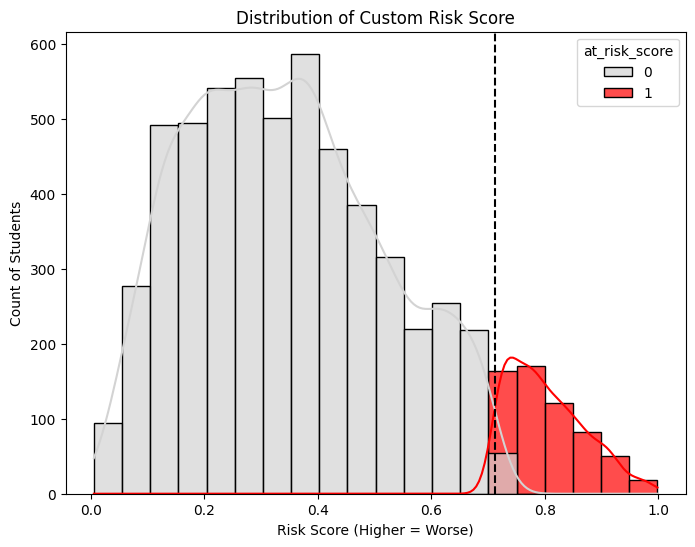

In [30]:
# the threshold and the count of at-risk students
print(f"Risk Score Threshold (90th percentile): {threshold:.4f}")
at_risk_count = df['at_risk_score'].sum()
total_students = len(df)
print(f"Number of students flagged as At-Risk: {at_risk_count} ({at_risk_count / total_students * 100:.1f}%)")
flag_col = 'at_risk_score'
# Visualize the Risk Score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='risk_score', bins=20, kde=True, hue=flag_col, palette=['lightgray', 'red'], alpha=0.7)
#sns.histplot(df['risk_score'], bins=20, kde=True,  hue=df[df['rist_score']==1],color='red')
plt.axvline(x=threshold, color='black', linestyle='--', label=f'90th Percentile Threshold: {threshold:.4f}')
plt.title('Distribution of Custom Risk Score')
plt.xlabel('Risk Score (Higher = Worse)')
plt.ylabel('Count of Students')
plt.show()

In [31]:

risk_correlated_features = df.corr()['risk_score']
features_to_exclude = ['risk_score', 'at_risk_score', 'GradeClass']
top_4_features = (
    risk_correlated_features
    .drop(features_to_exclude, errors='ignore')
    .abs()
    .nlargest(4)
    .index
    .tolist()
)

top_4_features

['GPA', 'Absences', 'StudyTimeWeekly', 'Tutoring']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# The top 4 features (excluding the target itself) are used for X
features = ['GPA', 'Absences', 'GradeClass', 'StudyTimeWeekly'] # Adjust this list if needed

# The target variable for flagging "at_risk"
X = df[features]
y = df['at_risk_score'] # the column that acts as the binary flag (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Recommended for classification to ensure balanced target classes in train/test sets
)

In [33]:
# Initialize and Train the Logistic Regression Model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Model Accuracy: 0.9961

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1635
           1       0.99      0.97      0.98       182

    accuracy                           1.00      1817
   macro avg       0.99      0.99      0.99      1817
weighted avg       1.00      1.00      1.00      1817




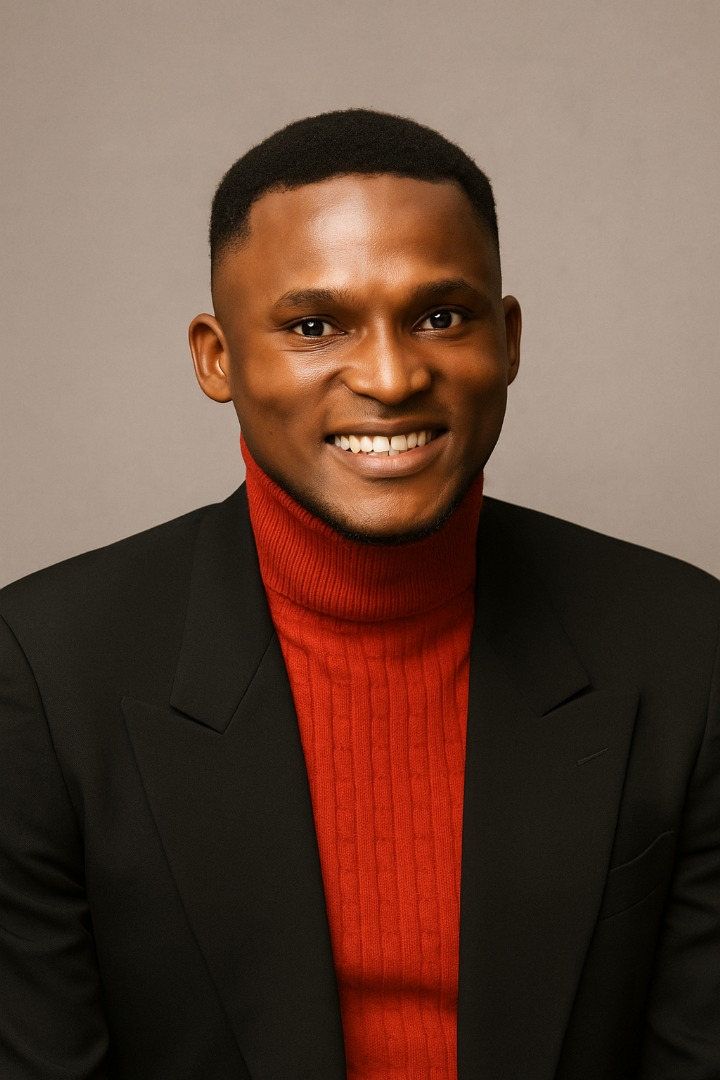

In [34]:
# Use this code in a Python Code Cell in your Jupyter Notebook.
# It uses the IPython.display module to force the rendering of HTML content.
from IPython.display import HTML
import base64
import os

# --- Step 1: Define the path to your local image ---
# IMPORTANT: Ensure this path is correct and accessible by your Python environment.
IMAGE_PATH = r"C:\Users\chris\OneDrive\Documents\Desktop\WhatsApp Image 2025-09-19 at 15.13.37_501d24f0.jpg"

def image_to_base64(filepath):
    """Reads a local image file and converts it to a Base64 encoded string."""
    if not os.path.exists(filepath):
        print(f"Error: File not found at path: {filepath}")
        return "https://placehold.co/100x100/7E3D8E/ffffff?text=Image+Error" # Fallback
    
    try:
        with open(filepath, "rb") as image_file:
            # Get the image file extension to determine the MIME type
            _, ext = os.path.splitext(filepath)
            mime_type = f"image/{ext.lower().lstrip('.')}"
            
            # Encode the image data
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            
            # Return the full data URI
            return f"data:{mime_type};base64,{encoded_string}"
    except Exception as e:
        print(f"Error processing image file: {e}")
        return "https://placehold.co/100x100/FF5733/ffffff?text=Processing+Error" # Fallback

# --- Step 2: Generate the Base64 Data URI ---
IMAGE_DATA_URI = image_to_base64(IMAGE_PATH)

html_content = f"""
<!-- 
    This HTML and CSS snippet is designed to be rendered within a 
    Jupyter Notebook using IPython.display.HTML.
-->
<div style="text-align: center;"> <!-- Added outer div for centering -->
    <div class="profile-card-container">
        <style>
            /* Embed the CSS directly for Jupyter Notebook rendering */
            .profile-card-container {{
                display: flex;
                align-items: center;
                /* Centering the block element itself */
                margin: 0 auto; 
                padding: 30px; /* Increased padding */
                border: 1px solid #dcdcdc; /* Lighter border */
                border-radius: 16px; /* More rounded corners */
                box-shadow: 0 6px 12px rgba(0, 0, 0, 0.1); /* Stronger shadow for visibility */
                /* Max-width adjusted for wider appearance */
                max-width: 100%; 
                width: 700px; 
                font-family: 'Inter', sans-serif;
                background-color: #ffffff; /* White background for contrast */
                transition: transform 0.2s, box-shadow 0.2s;
            }}

            .profile-card-container:hover {{
                transform: translateY(-3px); /* Subtle lift effect */
                box-shadow: 0 10px 20px rgba(0, 0, 0, 0.15); 
            }}

            .profile-image-wrapper {{
                /* UPDATED: Increased size for better visibility */
                width: 140px; 
                height: 200px;
                border-radius: 50%; /* Maintains circular shape */
                overflow: hidden; 
                border: 5px solid #7E3D8E; /* Thicker, noticeable border */
                flex-shrink: 0; 
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.2); /* Shadow around image */
            }}

            .profile-image-wrapper img {{
                width: 100%;
                height: 100%;
                object-fit: cover; 
            }}

            .profile-info {{
                margin-left: 30px; /* Increased margin */
                color: #2c3e50; /* Darker text for readability */
                flex-grow: 1; 
                text-align: left; 
            }}

            .profile-info h3 {{
                margin: 0 0 5px 0;
                font-size: 1.8em; /* Larger name */
                color: #34495e; 
                font-weight: 600;
            }}

            .profile-info p {{
                margin: 6px 0;
                font-size: 1.1em; /* Larger contact details */
                color: #555;
            }}
        </style>

        <div class="profile-image-wrapper">
            <!-- The image source is now the Base64 encoded string -->
            <img src="{IMAGE_DATA_URI}" alt="Profile Picture">
       
            </div>
            <div class="profile-info">
            <h3>Odunayomide YAKUBU</h3>
            <p>Data Scientist | ML Enthusiast | Data Storyteller </p>
            <p>Email✉️: christianamide6@email.com</p>
            <p>LinkedIn : Odunayomide Yakubu</p>
            <p>Github: Odunayomide Yakubu</p>
            <p>Contact 📞: +234 9132 112 946 </p>
        </div>
    </div>
</div>
"""

# Render the HTML content
HTML(html_content)
